In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score

In [17]:
train = pd.read_csv('train.csv')

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [19]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
train.drop(['Name', 'Ticket', 'Cabin'], inplace = True, axis = 1)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [23]:
train.Age = train.Age.fillna(train.Age.mean())

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.7+ KB


In [25]:
train.dropna(inplace = True)

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [27]:
label = train['Embarked'].unique().tolist()

In [43]:
label

['S', 'C', 'Q']

In [28]:
train['Embarked'] = train['Embarked'].apply(lambda x: label.index(x))
#train['Embarked'] = train['Embarked'].astype('category').cat.codes

In [31]:
train['Sex'] = train['Sex'].astype('category').cat.codes
#train['Sex'] = (train['Sex'] == 'male').astype(int)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [44]:
x = train.loc[:, train.columns != 'Survived']

In [45]:
y = train.loc[:, train.columns == 'Survived']

In [63]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3)

In [47]:
xtrain.shape

(622, 8)

In [67]:
xtrain.index

RangeIndex(start=0, stop=622, step=1)

In [64]:
xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
790,791,3,1,29.699118,0,0,7.75,2
757,758,2,1,18.000000,0,0,11.50,0
605,606,3,1,36.000000,1,0,15.55,0
183,184,2,1,1.000000,2,1,39.00,0
513,514,1,0,54.000000,1,0,59.40,1


In [66]:
for i in [xtrain, xtest, ytrain, ytest]:
    i.index = range(i.shape[0])

#xtrain.reset_index(inplace = True, drop = True)

In [68]:
clf = DecisionTreeClassifier(random_state=1)
clf = clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)

score

0.7303370786516854

In [69]:
clf = DecisionTreeClassifier(random_state=1)
score = cross_val_score(clf, x, y, cv = 10).mean()

In [70]:
score

0.7447522982635343

In [106]:
score_train = []
score_test = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=1, 
                                 max_depth=i+1,
                                 criterion='entropy',
                                 #splitter='random'
                                )
    clf = clf.fit(xtrain, ytrain)
    score_t = clf.score(xtrain,ytrain)
    score = cross_val_score(clf, x, y, cv=10).mean()
    score_train.append(score_t)
    score_test.append(score)
print(max(score_train), score_train.index(max(score_train))+1)
print(max(score_test), score_test.index(max(score_test))+1)

0.9163987138263665 10
0.8166624106230849 3


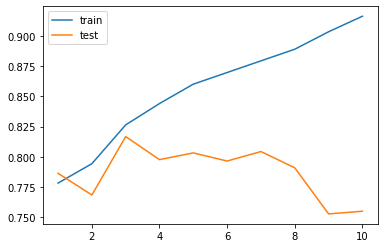

In [100]:
plt.plot(range(1,11), score_train, label = 'train')
plt.plot(range(1,11), score_test, label='test')
plt.legend()
plt.show()

# 網格搜索

In [112]:
parameter = {'splitter':('best', 'random'),
             'criterion':('gini', 'entropy'),
             'max_depth':[*range(1,10),],
             'min_samples_leaf':[*range(1,50,5)]
            }
clf = DecisionTreeClassifier(random_state=1)
GS = GridSearchCV(clf, parameter, cv=5)
GS.fit(xtrain, ytrain)

print(GS.best_params_)
print(GS.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'splitter': 'best'}
0.8167202572347267


C:\Users\Karma\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
